<a href="https://colab.research.google.com/github/actkk/weather-forecast-app/blob/main/Bil401Proje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark
!pip install fastparquet
!pip install pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=05d90f5509070182f38aa97a6698ba85dbffc74a6465dc143fe8c3ab2e818690
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pyspark.sql import SparkSession
from fastparquet import write
import pyarrow as pa
import pyarrow.parquet as pq
from pyspark.sql.functions import col



# SparkSession başlatma
spark = SparkSession.builder.appName("AnkaraWeatherQuery").getOrCreate()
spark.conf.set("spark.sql.parquet.datetimeRebaseModeInRead", "LEGACY")

# Parquet dosyasını DataFrame olarak okuma
file_path = "/content/drive/MyDrive/Bil401Veri/daily_weather.parquet"

df = spark.read.parquet(file_path)


# "city_name" sütunu "ankara" olan satırları seçme

ankara_data = df.filter(df.city_name == "Ankara")


ankara_data_springSnow = ankara_data.filter((col("date") >= "2022-01-01") & (col("date") <= "2022-12-31"))


# PySpark DataFrame'ini Pandas DataFrame'ine dönüştürme
pandas_df = ankara_data_springSnow.toPandas()

# Pandas DataFrame'ini PyArrow tablosuna dönüştürme
arrow_table = pa.Table.from_pandas(pandas_df)

# PyArrow tablosunu Parquet dosyası olarak yazma
pq.write_table(arrow_table, 'AnkaraWeather2022.parquet')

# Sonuç sayısını ekrana yazdırma
print(ankara_data_springSnow.count())

# Sonuçları ekrana yazdırma
ankara_data_springSnow.show()
# SparkSession kapatma
spark.stop()


365
+----------+---------+-------------------+------+----------+----------+----------+----------------+-------------+----------------+------------------+------------------+----------------------+------------------+-----------------+
|station_id|city_name|               date|season|avg_temp_c|min_temp_c|max_temp_c|precipitation_mm|snow_depth_mm|avg_wind_dir_deg|avg_wind_speed_kmh|peak_wind_gust_kmh|avg_sea_level_pres_hpa|sunshine_total_min|__index_level_0__|
+----------+---------+-------------------+------+----------+----------+----------+----------------+-------------+----------------+------------------+------------------+----------------------+------------------+-----------------+
|     17130|   Ankara|2022-01-01 00:00:00|Winter|       4.4|       1.9|       6.8|             0.2|         NULL|           225.0|               5.8|              NULL|                1019.7|              NULL|             5376|
|     17130|   Ankara|2022-01-02 00:00:00|Winter|       4.7|      -2.4|       8.

In [ ]:
#AnkaraWeather2022 Karlı günler

from pyspark.sql import SparkSession
from fastparquet import write
import pyarrow as pa
import pyarrow.parquet as pq
from pyspark.sql.functions import col

# SparkSession başlatma
spark = SparkSession.builder.appName("AnkaraWeatherQuery").getOrCreate()
spark.conf.set("spark.sql.parquet.datetimeRebaseModeInRead", "LEGACY")

# Parquet dosyasını DataFrame olarak okuma
file_path = "/content/AnkaraWeather2022.parquet"

df = spark.read.parquet(file_path)



ankara_data = df.drop('station_id').filter(col('snow_depth_mm')>0)

print(ankara_data.count())
ankara_data.show()
spark.stop()

8
+---------+-------------------+------+----------+----------+----------+----------------+-------------+----------------+------------------+------------------+----------------------+------------------+-----------------+
|city_name|               date|season|avg_temp_c|min_temp_c|max_temp_c|precipitation_mm|snow_depth_mm|avg_wind_dir_deg|avg_wind_speed_kmh|peak_wind_gust_kmh|avg_sea_level_pres_hpa|sunshine_total_min|__index_level_0__|
+---------+-------------------+------+----------+----------+----------+----------------+-------------+----------------+------------------+------------------+----------------------+------------------+-----------------+
|   Ankara|2022-01-28 00:00:00|Winter|      -4.3|     -10.9|      -1.5|             0.0|         61.0|           178.0|               4.4|              NULL|                1027.2|              NULL|             5403|
|   Ankara|2022-01-29 00:00:00|Winter|      -4.8|     -12.6|      -0.4|             0.0|         51.0|           148.0|       

In [ ]:
#AnkaraWeather2022 Kar yağan günler

from pyspark.sql import SparkSession
from fastparquet import write
import pyarrow as pa
import pyarrow.parquet as pq
from pyspark.sql.functions import col

# SparkSession başlatma
spark = SparkSession.builder.appName("AnkaraWeatherQuery").getOrCreate()
spark.conf.set("spark.sql.parquet.datetimeRebaseModeInRead", "LEGACY")

# Parquet dosyasını DataFrame olarak okuma
file_path = "/content/AnkaraWeather2022.parquet"

df = spark.read.parquet(file_path)



ankara_data = df.drop('station_id').filter(col('precipitation_mm')>0).filter(col('snow_depth_mm')>0)

print(ankara_data.count())
ankara_data.show()
spark.stop()

5
+---------+-------------------+------+----------+----------+----------+----------------+-------------+----------------+------------------+------------------+----------------------+------------------+-----------------+
|city_name|               date|season|avg_temp_c|min_temp_c|max_temp_c|precipitation_mm|snow_depth_mm|avg_wind_dir_deg|avg_wind_speed_kmh|peak_wind_gust_kmh|avg_sea_level_pres_hpa|sunshine_total_min|__index_level_0__|
+---------+-------------------+------+----------+----------+----------+----------------+-------------+----------------+------------------+------------------+----------------------+------------------+-----------------+
|   Ankara|2022-01-30 00:00:00|Winter|      -3.4|      -9.6|       0.7|             0.4|         41.0|           149.0|               5.7|              NULL|                1022.1|              NULL|             5405|
|   Ankara|2022-01-31 00:00:00|Winter|      -0.5|      -9.1|       1.2|             8.1|         10.0|           229.0|       

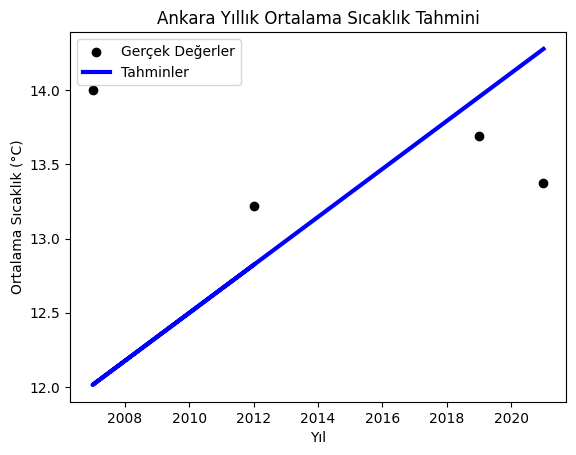

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import year, avg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# SparkSession başlatma ve ayarları yapılandırma
spark = SparkSession.builder.appName("AnkaraWeatherAnalysis")\
    .config("spark.sql.parquet.int96RebaseModeInRead", "CORRECTED")\
    .config("spark.sql.parquet.datetimeRebaseModeInRead", "CORRECTED")\
    .getOrCreate()

# Parquet dosyasını DataFrame olarak okuma
file_path = "/content/drive/MyDrive/Bil401Veri/daily_weather.parquet"
df = spark.read.parquet(file_path)

# Ankara şehri için verileri filtreleme ve yıllara göre ortalama sıcaklık hesaplama
ankara_df = df.filter(df.city_name == "Ankara")
yearly_avg_temp = ankara_df.withColumn("year", year("date")).groupBy("year").agg(avg("avg_temp_c").alias("avg_temp"))

# Spark DataFrame'ini Pandas DataFrame'ine dönüştürme
yearly_avg_temp_pd = yearly_avg_temp.toPandas()

# SparkSession kapatma
spark.stop()
# Veri setini özellikler ve hedef değişken olarak ayırma
X = yearly_avg_temp_pd[['year']]
y = yearly_avg_temp_pd['avg_temp']

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Lineer Regresyon modelini eğitme
model = LinearRegression()
model.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Gerçek değerlerle tahminleri karşılaştırma
plt.scatter(X_test, y_test, color='black', label='Gerçek Değerler')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Tahminler')
plt.title('Ankara Yıllık Ortalama Sıcaklık Tahmini')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Sıcaklık (°C)')
plt.legend()
plt.show()

Modelin Ortalama Kare Hatası (MSE): 16.447611053187366


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


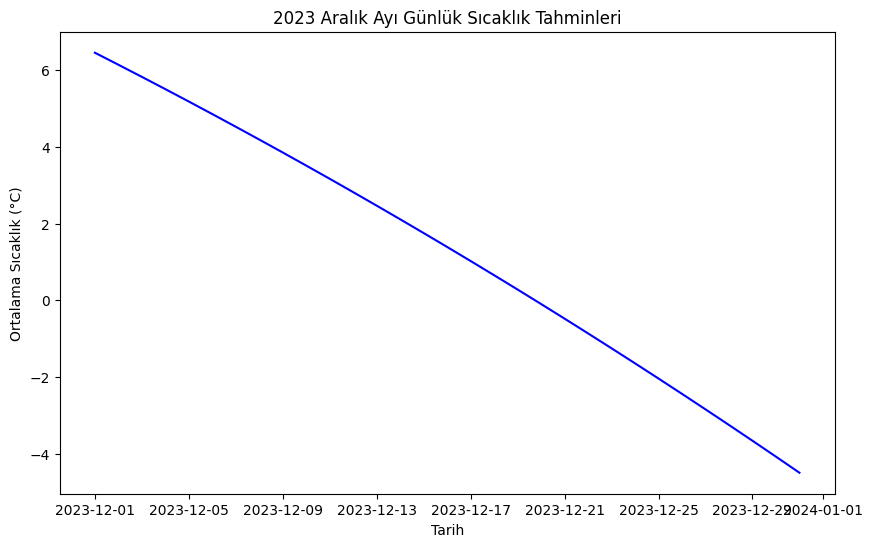

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np


# SparkSession başlatma ve ayarları yapılandırma
spark = SparkSession.builder.appName("AnkaraWeatherAnalysis")\
    .config("spark.sql.parquet.int96RebaseModeInRead", "CORRECTED")\
    .config("spark.sql.parquet.datetimeRebaseModeInRead", "CORRECTED")\
    .getOrCreate()

# Parquet dosyasını DataFrame olarak okuma
file_path = "/content/drive/MyDrive/Bil401Veri/daily_weather.parquet"
df = spark.read.parquet(file_path)

# Ankara şehri için verileri filtreleme
ankara_weather = df.filter(col("city_name") == "Ankara")

# Veriyi Pandas DataFrame'ine dönüştürme
ankara_weather_pd = ankara_weather.toPandas()

# SparkSession kapatma
spark.stop()
# Tarih sütununu gün sayısına dönüştürme
ankara_weather_pd['date'] = pd.to_datetime(ankara_weather_pd['date'])
ankara_weather_pd['day_of_year'] = ankara_weather_pd['date'].dt.dayofyear

# Özellikler ve hedef sütun
X = ankara_weather_pd[['day_of_year']]  # Gün sayısı
y = ankara_weather_pd['avg_temp_c']  # Ortalama sıcaklık

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Polinomiyal özellikler oluşturma
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Lineer Regresyon modelini eğitme
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Tahmin yapma ve model performansını değerlendirme
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
print("Modelin Ortalama Kare Hatası (MSE):", mse)

# 2023 Aralık ayının günlerini tahmin etme
dec_2023_days = pd.date_range('2023-12-01', '2023-12-31').dayofyear
dec_2023_preds = model.predict(poly.transform(np.array(dec_2023_days).reshape(-1, 1)))

# Tahminleri görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(pd.date_range('2023-12-01', '2023-12-31'), dec_2023_preds, color='blue')
plt.title('2023 Aralık Ayı Günlük Sıcaklık Tahminleri')
plt.xlabel('Tarih')
plt.ylabel('Ortalama Sıcaklık (°C)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


        Tarih  Tahmini Ortalama Sıcaklık (°C)
0  2023-12-01                        6.454583
1  2023-12-02                        6.141484
2  2023-12-03                        5.824916
3  2023-12-04                        5.504866
4  2023-12-05                        5.181321
..        ...                             ...
57 2024-01-27                        1.884548
58 2024-01-28                        2.019889
59 2024-01-29                        2.155774
60 2024-01-30                        2.292190
61 2024-01-31                        2.429124

[62 rows x 2 columns]


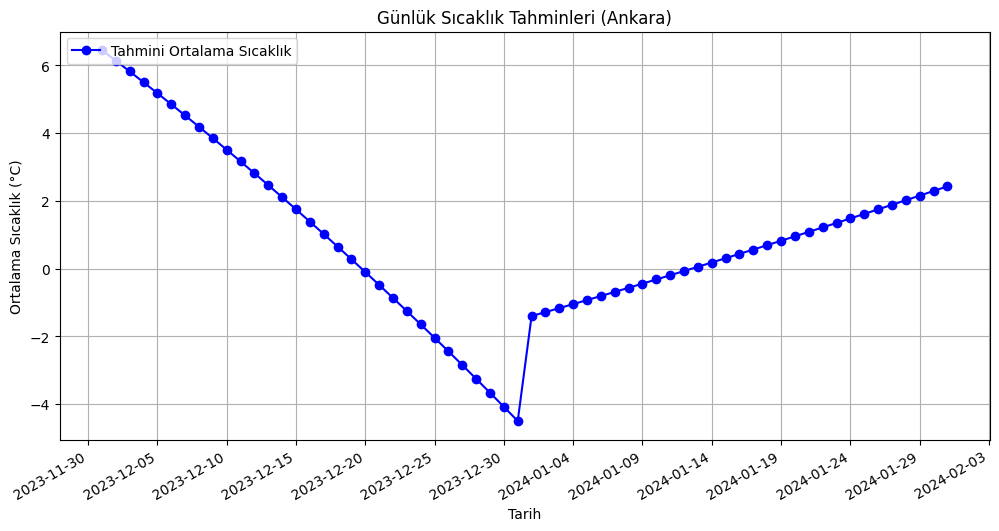

In [ ]:
#lineer reg

from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt



# SparkSession başlatma ve ayarları yapılandırma
spark = SparkSession.builder.appName("AnkaraWeatherAnalysis")\
    .config("spark.sql.parquet.int96RebaseModeInRead", "CORRECTED")\
    .config("spark.sql.parquet.datetimeRebaseModeInRead", "CORRECTED")\
    .getOrCreate()

# Parquet dosyasını DataFrame olarak okuma
file_path = "/content/drive/MyDrive/Bil401Veri/daily_weather.parquet"
df = spark.read.parquet(file_path)

# Ankara şehri için verileri filtreleme
ankara_weather = df.filter(col("city_name") == "Ankara")

# Veriyi Pandas DataFrame'ine dönüştürme
ankara_weather_pd = ankara_weather.toPandas()

# SparkSession kapatma
spark.stop()
# Tarih sütununu gün sayısına dönüştürme
ankara_weather_pd['date'] = pd.to_datetime(ankara_weather_pd['date'])
ankara_weather_pd['day_of_year'] = ankara_weather_pd['date'].dt.dayofyear

# Özellikler ve hedef sütun
X = ankara_weather_pd[['day_of_year']]  # Gün sayısı
y = ankara_weather_pd['avg_temp_c']  # Ortalama sıcaklık

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Polinomiyal özellikler oluşturma
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)

# Lineer Regresyon modelini eğitme
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 2023 Aralık ayının günlerini tahmin etme
dec_2023_days = pd.date_range('2023-12-01', '2024-1-31')
dec_2023_day_of_year = dec_2023_days.dayofyear
dec_2023_preds = model.predict(poly.transform(np.array(dec_2023_day_of_year).reshape(-1, 1)))

# Tahminleri bir DataFrame'e dönüştürme ve gösterme
dec_2023_forecast_df = pd.DataFrame({
    'Tarih': dec_2023_days,
    'Tahmini Ortalama Sıcaklık (°C)': dec_2023_preds
})
print(dec_2023_forecast_df)
# Grafik oluşturma
plt.figure(figsize=(12, 6))
plt.plot(dec_2023_forecast_df['Tarih'], dec_2023_forecast_df['Tahmini Ortalama Sıcaklık (°C)'], marker='o', linestyle='-', color='b')

# Grafik başlığı ve eksen etiketleri
plt.title('Günlük Sıcaklık Tahminleri (Ankara)')
plt.xlabel('Tarih')
plt.ylabel('Ortalama Sıcaklık (°C)')

# Eksen ayarları
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gcf().autofmt_xdate()  # Tarih formatını düzeltir

# Gösterge ekleme
plt.grid(True)
plt.legend(['Tahmini Ortalama Sıcaklık'], loc='upper left')

# Görselleştirmeyi göster
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


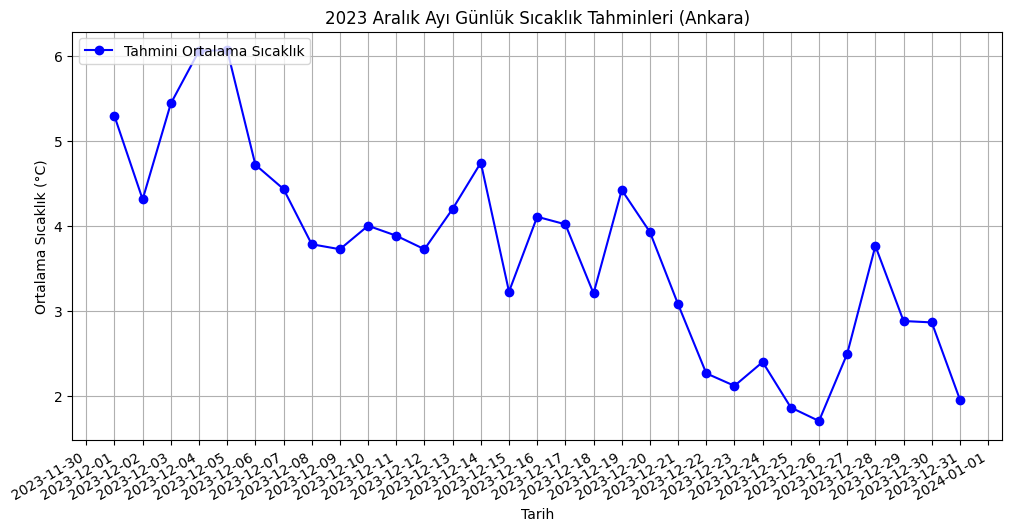

Modelin Ortalama Kare Hatası (MSE): 13.632246167524452
Modelin Kök Ortalama Kare Hatası (RMSE): 3.692187179372743


In [ ]:
#RandomForestRegressor
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt




# SparkSession başlatma ve ayarları yapılandırma
spark = SparkSession.builder.appName("AnkaraWeatherAnalysis")\
    .config("spark.sql.parquet.int96RebaseModeInRead", "CORRECTED")\
    .config("spark.sql.parquet.datetimeRebaseModeInRead", "CORRECTED")\
    .getOrCreate()

# Parquet dosyasını DataFrame olarak okuma
file_path = "/content/drive/MyDrive/Bil401Veri/daily_weather.parquet"
df = spark.read.parquet(file_path)

# Ankara şehri için verileri filtreleme
ankara_weather = df.filter(col("station_id") == 17130)

# Veriyi Pandas DataFrame'ine dönüştürme
ankara_weather_pd = ankara_weather.toPandas()

# SparkSession kapatma
spark.stop()

# Tarih sütununu gün sayısına dönüştürme
ankara_weather_pd['date'] = pd.to_datetime(ankara_weather_pd['date'])
ankara_weather_pd['day_of_year'] = ankara_weather_pd['date'].dt.dayofyear

# Özellikler ve hedef sütun
X = ankara_weather_pd[['day_of_year']]  # Gün sayısı
y = ankara_weather_pd['avg_temp_c']  # Ortalama sıcaklık

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train_poly, y_train)

# 2023 Aralık ayı için tahmin yapma
dec_2023_days = pd.date_range('2023-12-01', '2023-12-31')
dec_2023_day_of_year = dec_2023_days.dayofyear
dec_2023_preds = model.predict(poly.transform(np.array(dec_2023_day_of_year).reshape(-1, 1)))

# Tahminleri bir DataFrame'e dönüştürme
dec_2023_forecast_df = pd.DataFrame({
    'Tarih': dec_2023_days,
    'Tahmini Ortalama Sıcaklık (°C)': dec_2023_preds
})
# Grafik oluşturma
plt.figure(figsize=(12, 6))
plt.plot(dec_2023_forecast_df['Tarih'], dec_2023_forecast_df['Tahmini Ortalama Sıcaklık (°C)'], marker='o', linestyle='-', color='b')

# Grafik başlığı ve eksen etiketleri
plt.title('2023 Aralık Ayı Günlük Sıcaklık Tahminleri (Ankara)')
plt.xlabel('Tarih')
plt.ylabel('Ortalama Sıcaklık (°C)')

# Eksen ayarları
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gcf().autofmt_xdate()

# Gösterge ekleme
plt.grid(True)
plt.legend(['Tahmini Ortalama Sıcaklık'], loc='upper left')

# Görselleştirmeyi göster
plt.show()
# Test seti üzerinde tahminler yapma
y_test_pred = model.predict(poly.transform(X_test))

# MSE ve RMSE hesaplama
mse = mean_squared_error(y_test, y_test_pred)
rmse = sqrt(mse)

print("Modelin Ortalama Kare Hatası (MSE):", mse)
print("Modelin Kök Ortalama Kare Hatası (RMSE):", rmse)


In [ ]:
from pyspark.sql import SparkSession
from fastparquet import write
import pyarrow as pa
import pyarrow.parquet as pq
from pyspark.sql.functions import col
spark = SparkSession.builder.appName("Station_idCityMatch").getOrCreate()
spark.conf.set("spark.sql.parquet.datetimeRebaseModeInRead", "LEGACY")
Cities_path = "/content/drive/MyDrive/Bil401Veri/cities.csv"
Weathers_path = "/content/drive/MyDrive/Bil401Veri/daily_weather.parquet"
df1 = spark.read.csv(Cities_path)
df1 = spark.read.csv(Cities_path, header=True, inferSchema=True)

cities = df1.drop("state","iso2","iso3","latitude","longitude").filter(col('country') =="Turkey")
#.withColumnRenamed("_c0", "station_id").withColumnRenamed("_c1", "city_name").withColumnRenamed("_c2", "country")
cities.printSchema()
cities.show()
df2 = spark.read.parquet(Weathers_path)
weathers = df2.filter(col('station_id')==17098)
weathers.printSchema()
print(weathers.count())
weathers.show()






spark.stop()



root
 |-- station_id: string (nullable = true)
 |-- city_name: string (nullable = true)
 |-- country: string (nullable = true)

+----------+--------------------+-------+
|station_id|           city_name|country|
+----------+--------------------+-------+
|     17190|      Afyonkarahisar| Turkey|
|     17130|              Ankara| Turkey|
|     17300|             Antalya| Turkey|
|     17370|Antioch on the Or...| Turkey|
|     17234|               Aydın| Turkey|
|     17150|           Balıkesir| Turkey|
|     17203|              Bingöl| Turkey|
|     17070|                Bolu| Turkey|
|     17116|               Bursa| Turkey|
|     17237|             Denizli| Turkey|
|     17280|          Diyarbakır| Turkey|
|     17050|              Edirne| Turkey|
|     17202|              Elâzığ| Turkey|
|     17092|            Erzincan| Turkey|
|     17096|             Erzurum| Turkey|
|     17260|           Gaziantep| Turkey|
|     17034|             Giresun| Turkey|
|     17088|           Gümüşhane

In [ ]:
from pyspark.sql import SparkSession
import pandas as pd
import folium
from sklearn.ensemble import RandomForestRegressor
import datetime
from folium import IFrame

# Şehirlerin koordinatlarını içeren CSV dosyasını yükle
cities_file_path = '/content/drive/MyDrive/Bil401Veri/cities.csv'
cities_df = pd.read_csv(cities_file_path)

# Hava durumu verilerini içeren Parquet dosyasını yükle
weather_file_path = '/content/drive/MyDrive/Bil401Veri/daily_weather.parquet'
weather_df = pd.read_parquet(weather_file_path)

# Türkiye'deki şehirleri filtrele
turkey_cities_df = cities_df[cities_df['country'] == 'Turkey']

# Bugünün tarihi
today = datetime.datetime.now()
today_day_of_year = today.timetuple().tm_yday
today_str = today.strftime("%Y-%m-%d")

# Harita oluştur
harita = folium.Map(location=[39.9334, 32.8597], zoom_start=6)

# Açıklama metni için HTML içeriği
html = f"<h4>Tahmin Yapılan Gün: {today_str}</h4><p>Hava Durumu Tahmini</p>"
iframe = IFrame(html, width=200, height=100)
popup = folium.Popup(iframe, max_width=2650)

# Açıklama metnini haritada göster
folium.Marker(
    [40.0, 32.0], popup=popup
).add_to(harita)

# Her şehir için ayrı bir model eğit ve tahmin yap
for index, city_row in turkey_cities_df.iterrows():
    city_name = city_row['city_name']

    # Şehre özgü hava durumu verilerini filtrele
    city_weather_df = weather_df[weather_df['city_name'] == city_name]
    city_weather_df = city_weather_df.dropna(subset=['avg_temp_c'])
    city_weather_df['date'] = pd.to_datetime(city_weather_df['date'])
    city_weather_df['day_of_year'] = city_weather_df['date'].dt.dayofyear
    print(city_weather_df.count())


    # Model eğitimi için veriyi hazırla
    if not city_weather_df.empty:
        X_train = city_weather_df[['day_of_year']]
        y_train = city_weather_df['avg_temp_c']

        # RandomForestRegressor modelini eğit
        model = RandomForestRegressor(n_estimators=100, random_state=0)
        model.fit(X_train, y_train)

        # Bugünkü sıcaklık tahmini yap
        X_predict = pd.DataFrame({'day_of_year': [today_day_of_year]})
        prediction = model.predict(X_predict)[0]

        # Harita üzerine işaretçi ekle
        folium.Marker(
            location=[city_row['latitude'], city_row['longitude']],
            popup=f"{city_name}: {prediction:.2f}°C",
            icon=folium.Icon(color='red')
        ).add_to(harita)

# Haritayı göster
harita


station_id                20278
city_name                 20278
date                      20278
season                    20278
avg_temp_c                20278
min_temp_c                16829
max_temp_c                16986
precipitation_mm          15875
snow_depth_mm              1220
avg_wind_dir_deg           2442
avg_wind_speed_kmh         4175
peak_wind_gust_kmh            0
avg_sea_level_pres_hpa      967
sunshine_total_min            0
day_of_year               20278
dtype: int64
station_id                5981
city_name                 5981
date                      5981
season                    5981
avg_temp_c                5981
min_temp_c                3333
max_temp_c                3064
precipitation_mm          3262
snow_depth_mm              134
avg_wind_dir_deg           967
avg_wind_speed_kmh         967
peak_wind_gust_kmh           0
avg_sea_level_pres_hpa     967
sunshine_total_min           0
day_of_year               5981
dtype: int64
station_id                224